---
# 🔌Integration of custom plots e.g. made using seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## functions from chrov
from chrov.viz.figure import plot_with_chroms

In [2]:
## input parameters
test=False
# test=True
input_dir_path='inputs'
output_dir_path='outputs'

In [ ]:
## set the current directory to 'examples'
import os
if len(set(['chrov','examples','tests']) - set(os.listdir('.')))==0:
    ## change the current directory from 'chrov' to 'examples'
    os.chdir('./examples')

In [3]:
if test:
    import logging
    logging.basicConfig(level=logging.INFO)
from os import makedirs
makedirs(output_dir_path,exist_ok=True)

**Demo data**

In [4]:
# cytobands to plot the chromosome
cytobands=pd.read_table(f'{input_dir_path}/cytobands.tsv',index_col=[0])
cytobands.head(1)

,chromosome,p start,q end,start,end,cytoband,cytoband type,arm,chromosome arm
0,1,121700001,125100000,1,2300000,p36.33,gneg,p,chr1p


In [5]:
genes=pd.read_table(f'{input_dir_path}/genes.tsv',index_col=[0])
genes=genes.assign(
    value=lambda df: df['gene start']/df.groupby('chromosome')['gene start'].transform(max)
    )
genes.head(1)

,gene symbol,chromosome,gene start,value
0,ATAD3B,1,1471765,0.005913


In [6]:
genes=genes.sample(100).assign(**{
    'type':lambda df: df['value']<0.5,
})
genes.head(1)

,gene symbol,chromosome,gene start,value,type
7081,ZDHHC1,16,67394152,0.748354,False


In [7]:
## sort chromosomes using a helper function of chrov
from chrov.viz.chrom import _sort_chroms
genes=(_sort_chroms(genes,)
    .astype({'chromosome':str})
    .assign(
        **{'x':lambda df: df.groupby('chromosome', sort=False).ngroup(),}
    ))

## Genome

**Demo data**

In [8]:
genes_annot=(
    genes
    .groupby('chromosome',as_index=False)
        .apply(lambda df: df.query(f"`value` == {df['value'].max()}")).reset_index(drop=True)
    )
genes_annot

,gene symbol,chromosome,gene start,value,type,chrom name instance,x
0,DDX59,1,200623896,0.806022,False,False,0
1,AVPI1,10,97677424,0.730988,False,False,9
2,OAF,11,120211032,0.894570,False,False,10
3,GOLGA3,12,132768902,0.996627,False,False,11
4,DACH1,13,71437966,0.624925,False,False,12
5,MAX,14,65006174,0.616017,False,False,13
6,PMFBP1,16,72112157,0.800743,False,False,14
7,GDPD1,17,59220467,0.712816,False,False,15
8,IFNL4,19,39246314,0.670168,False,False,16
9,CRYGC,2,208128137,0.860411,False,False,1


### linear layout

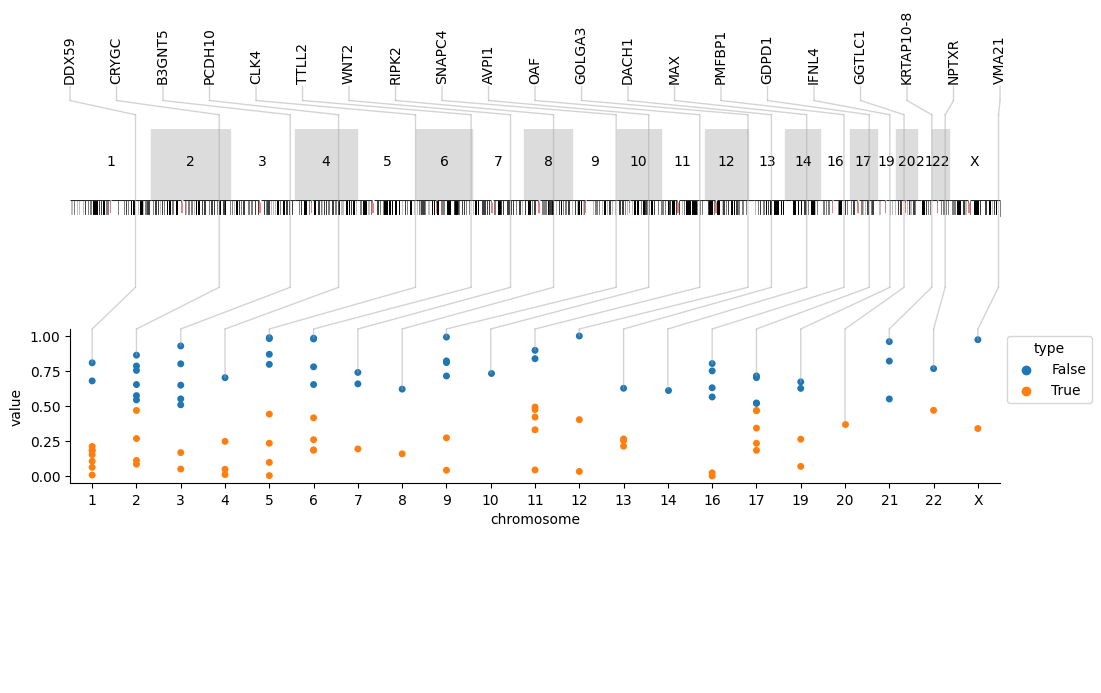

In [9]:
## external plot
import seaborn as sns

fig,ax=plt.subplots(figsize=[12,2])
sns.stripplot(
    data=genes,
    x='chromosome',
    y='value',
    hue='type',
    jitter=False,
    ax=ax,
)
ax.legend(bbox_to_anchor=[1,1],title='type')
sns.despine()

_=plot_with_chroms(
    data=genes_annot,
    cytobands=cytobands,
    kind='stripplot',
    colx='x',
    col_start='gene start',
    coly='value',
    col_label='gene symbol',
    xkind='values',
    va='bottom',
    off=2,
    offy=-1,
    # figsize=[18,2],
    ax_data=ax,
    arc=False,
    fig=None,
    kws_seaborn=dict(),
    kws_annot_chroms={},
    kws_annot_labels={},
    )
plt.savefig(f"{output_dir_path}/genome_linear_out_seaborn.png",bbox_inches='tight')

### polar layout (to be tested)